In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import json 
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms
import os
import matplotlib.pyplot as plt
m = nn.Softmax(dim=1)
"""
from utils import (
    GlobalParams,
    BlockArgs,
    BlockDecoder,
    efficientnet,
    get_model_params,
)
from model import EfficientNet, VALID_MODELS
"""

In [ ]:
!git clone https://github.com/harryoh99/Efficient_Net

In [ ]:
cd Efficient_Net/

In [ ]:
pip install -e .

In [ ]:
def transform_image(image):
  """ 
  In this function, make input image to tensor to use model.
  """
  my_transforms = transforms.Compose([transforms.Resize((224, 224)), 
                                      transforms.ToTensor(), 
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
  timg = my_transforms(image)
  timg.unsqueeze_(0)
  return timg

In [ ]:
def test(image):
  """
  In this function, classify input image with trained model.
  If probability is lower than 0.8, we guess it as wrong image(return -1).
  """
  x = transform_image(image)
  model.eval()
  output = model(x.to(device))
  out = m(output)
  out = out.tolist()[0]
  if (max(out)<0.95):
    print("wrong: ", max(out))
    pred = -1
  else:
    pred = out.index(max(out))
  return pred+1, max(out)

In [ ]:
def show_result(pred, image, prob):
  """
  Show input image with a result of the test function
  """
  fig = plt.figure()
  if pred>0:
    title = 'predict: ' + str(pred) + '   probability: ' + str(round(prob,3))
  else:
    title = 'predict: ' + str(pred)
  fig1 = fig.add_subplot(1, 1, 1)
  fig1.set_title(title)
  fig1.axis("off")
  plt.imshow(image)
  fig.tight_layout()    
  plt.show()

Loaded pretrained weights for efficientnet-b0


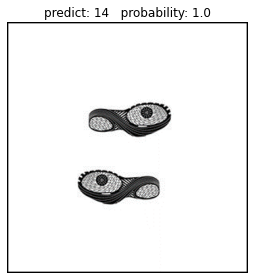

In [ ]:
from efficientnet_pytorch import EfficientNet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # set gpu

model_name = 'efficientnet-b0'  # b5
image_size = EfficientNet.get_image_size(model_name)
model = EfficientNet.from_pretrained(model_name, num_classes=15)

model = model.to(device)
model.load_state_dict(torch.load('/gdrive/MyDrive/CS470/Final_Proj/results/best.pt', map_location=device))

image = Image.open('/gdrive/MyDrive/CS470/Final_Proj/test_data/그림14.png').convert('RGB') # directory setting. Change this to path of an input image
pred, prob = test(image)
show_result(pred, image, prob)